In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score as accuracy
from sklearn import tree

# Немного про линейные модели и классификацию

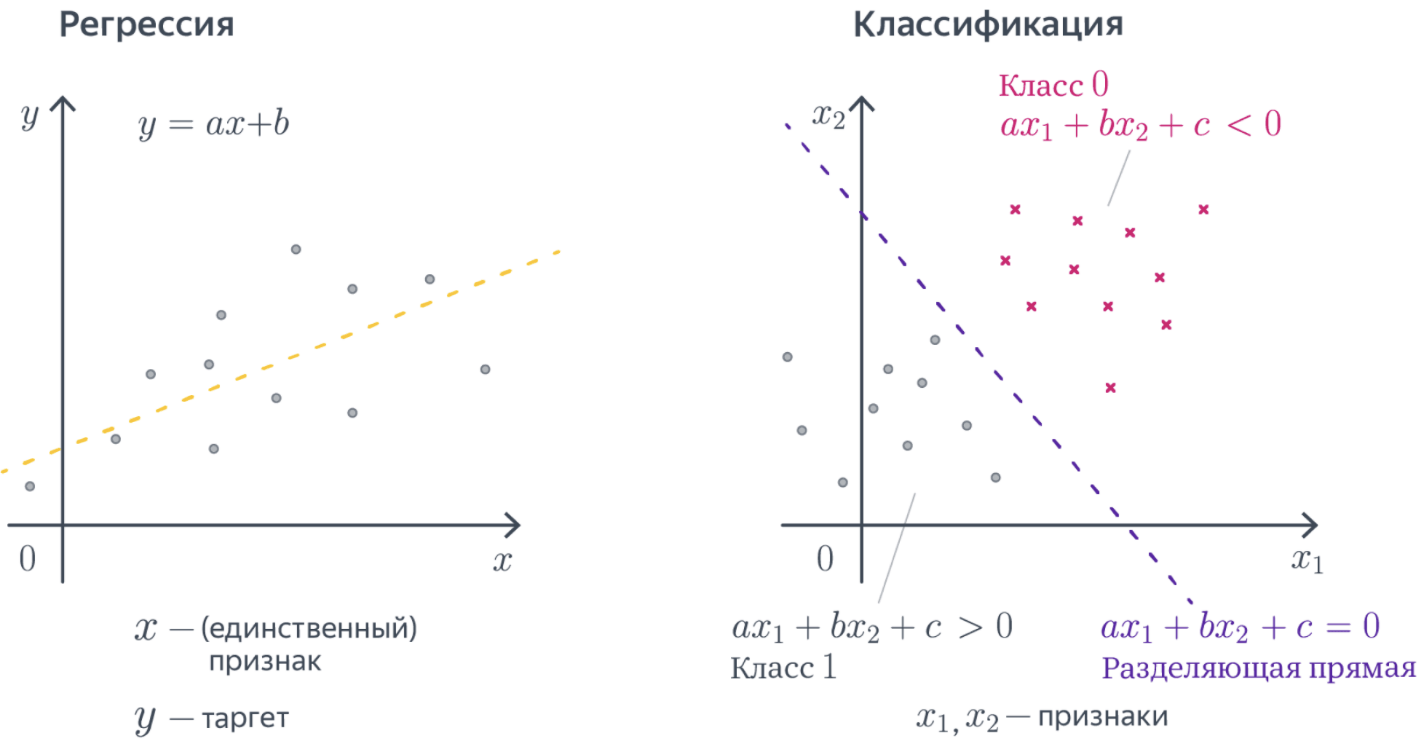

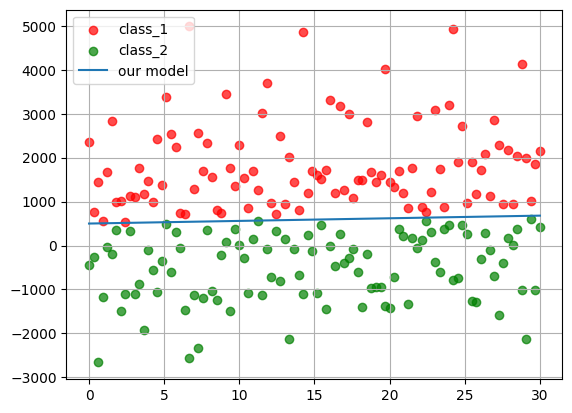

In [ ]:
x = np.linspace(0,30, 100)
b = 500
w = 6
class_1 = w * x + b + abs(np.random.normal(90, 1500, size = 100))

plt.grid(True)
class_2 = w * x + b - abs(np.random.normal(90, 1500, size = 100))

plt.scatter(x, class_1, label = 'class_1', alpha = 0.7, color = 'r')
plt.scatter(x, class_2, label = 'class_2', alpha = 0.7, color = 'g')

plt.plot(x, 6 * x + b, label = 'our model')
plt.legend()
plt.show()

Чаще всего используют логистичекую регрессию для оценки вероятностей.


\begin{align}
\mathbf{σ} = \frac{1}{1 + e^{-w*X}}
\end{align}

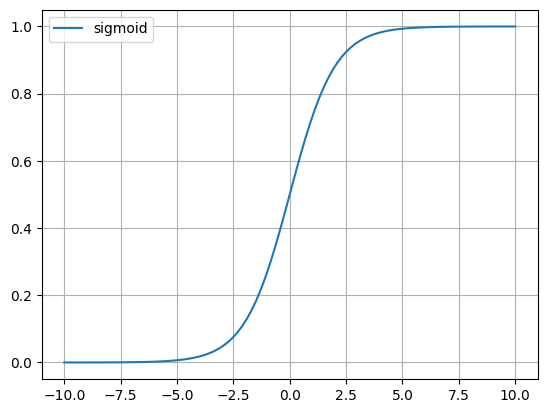

In [ ]:
x = np.linspace(-10, 10, 100)
y = 1 / (1 + np.exp(-x))
plt.grid(True)
plt.plot(x, y, label = 'sigmoid')
plt.legend()
plt.show()

# Для чего не подходят линейные модели?

In [ ]:
a_1 = np.random.normal(0, 5, size = 200)
b_1 = np.random.normal(0, 5, size = 200)

a_2 = np.random.normal(15, 30, size = 200)
b_2 = np.random.normal(15, 30, size = 200)

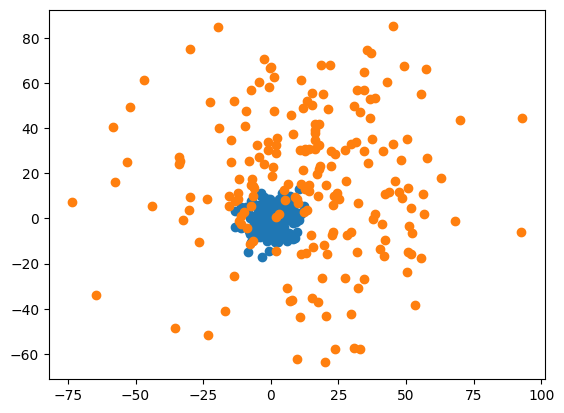

In [ ]:
plt.scatter(a_1, b_1)
plt.scatter(a_2, b_2)

In [ ]:
class_1 = np.array([1 for x in range(200)])
class_2 = np.array([2 for x in range(200)])

In [ ]:
data = pd.DataFrame({'a' : np.concatenate([a_1, a_2]), 'b' : np.concatenate([b_1, b_2]), \
                     'class' : np.concatenate([class_1, class_2])})
X = data.drop('class', axis = 1)
y = data['class']

In [ ]:
model = DecisionTreeClassifier(criterion = 'entropy', max_depth = 5)
model.fit(X, y)

DecisionTreeClassifier(criterion='entropy', max_depth=5)

In [ ]:
print(accuracy(model.predict(X), y))

0.9625


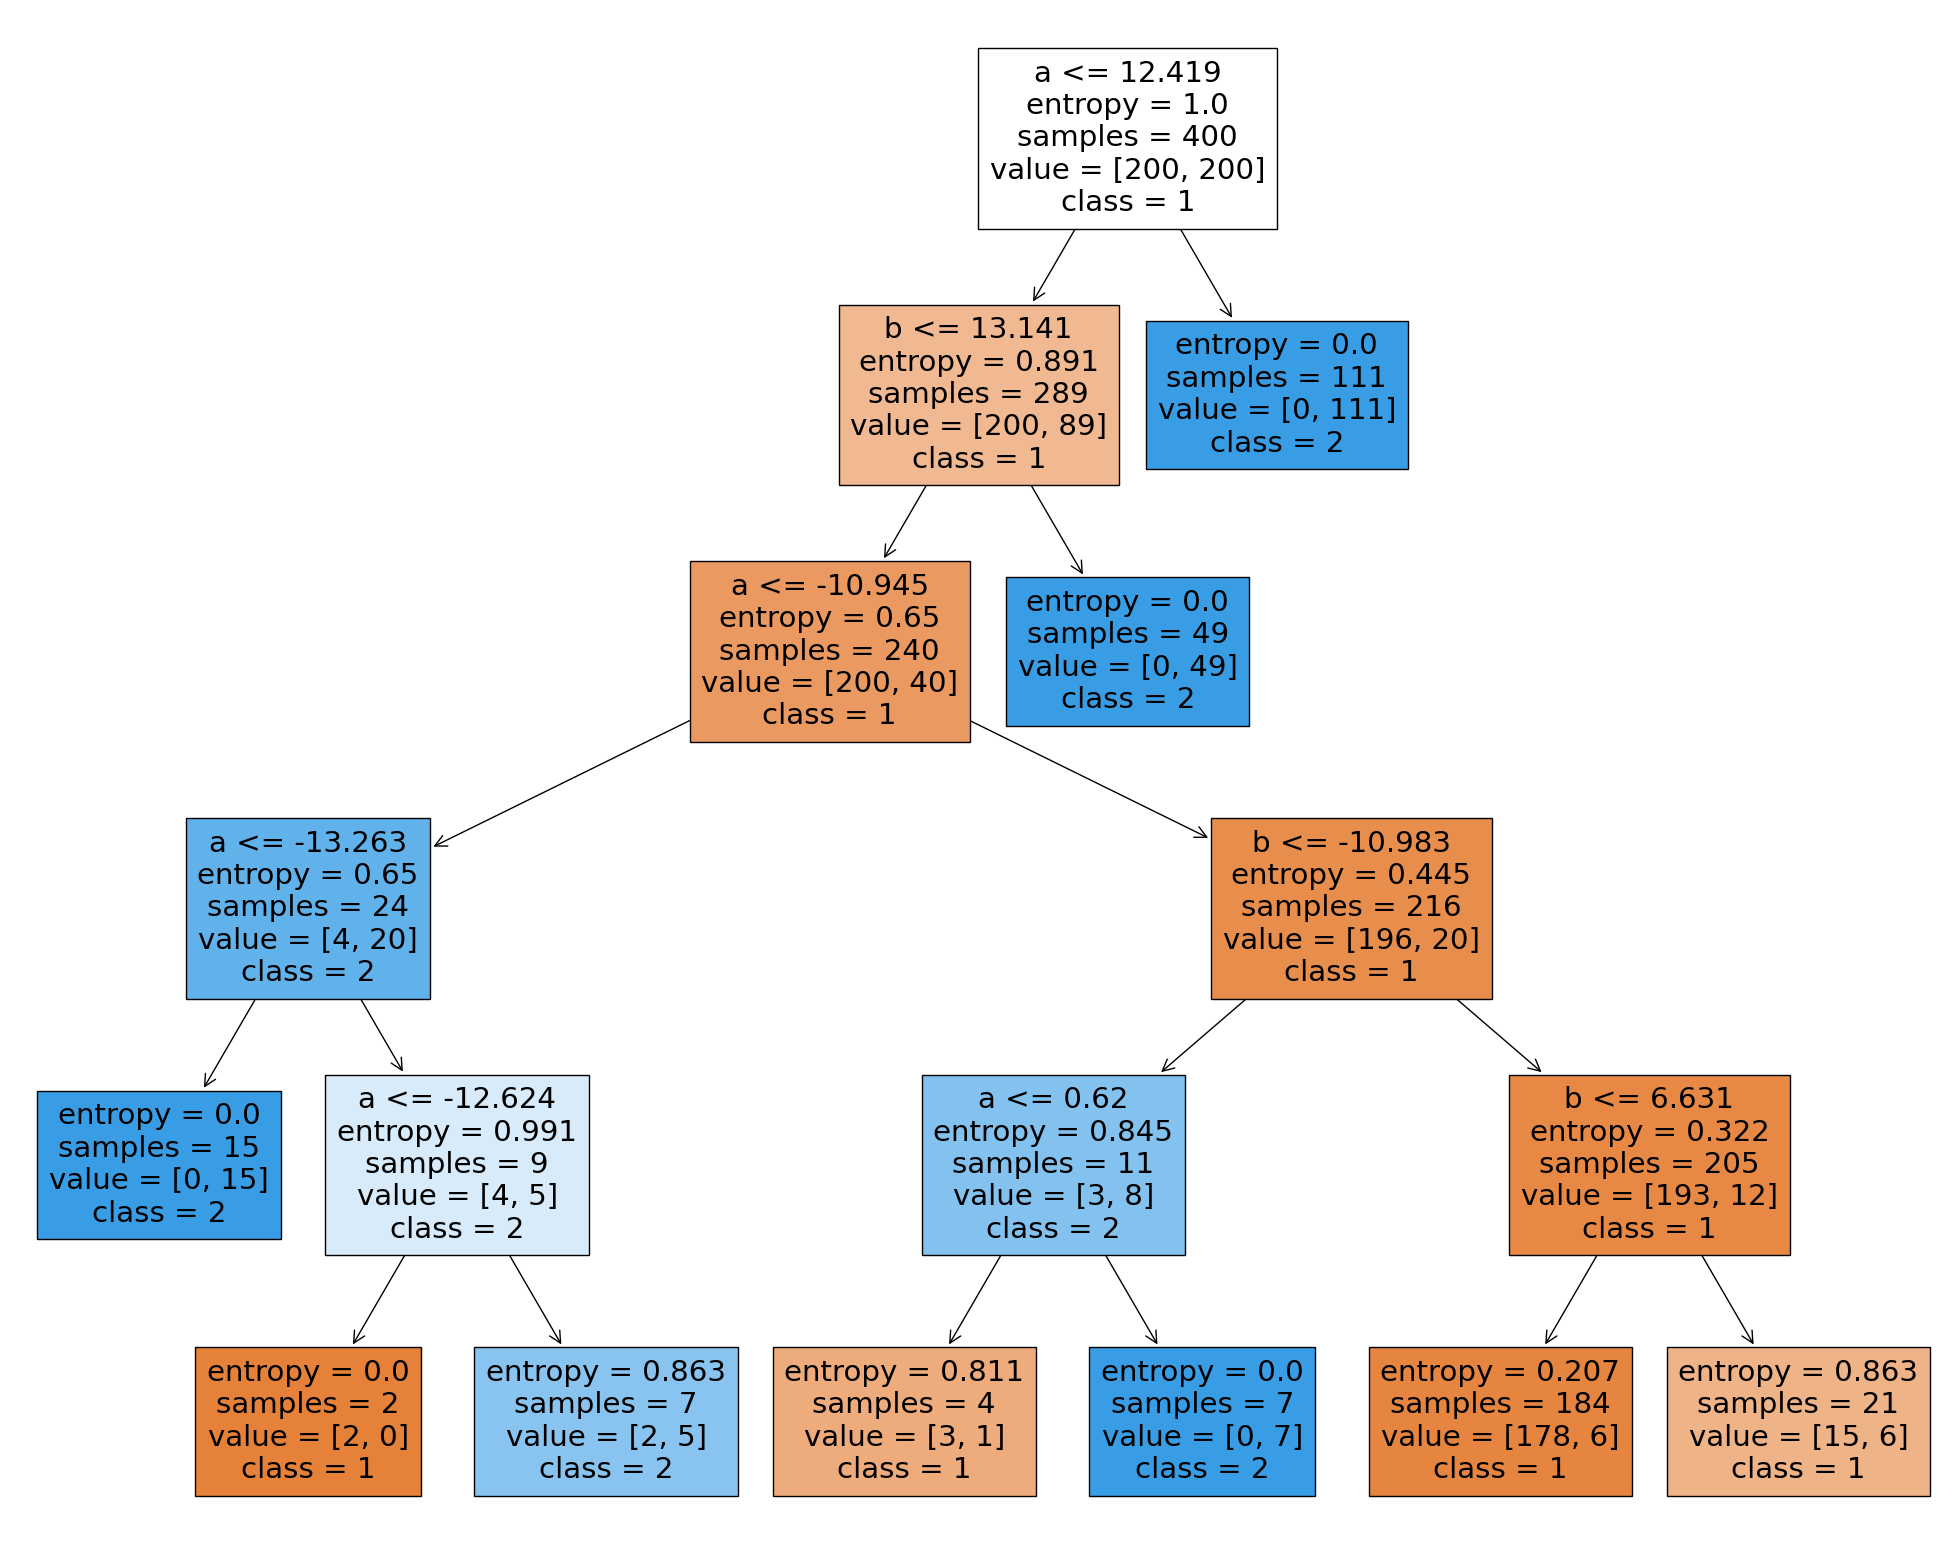

In [ ]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(model,
                   feature_names=['a', 'b'],
                   class_names=['1', '2'],
                   filled=True)

# Как строить дерево?

Чаще всего деревья строятся минимизируя какие-либо критерии. Расмотрим на примере энтропии.

\begin{align}
\mathbf{S} = -\sum^N_{i=1}p_ilog_2p_i
\end{align}

p_i - вероятность находится в i-ом состоянии

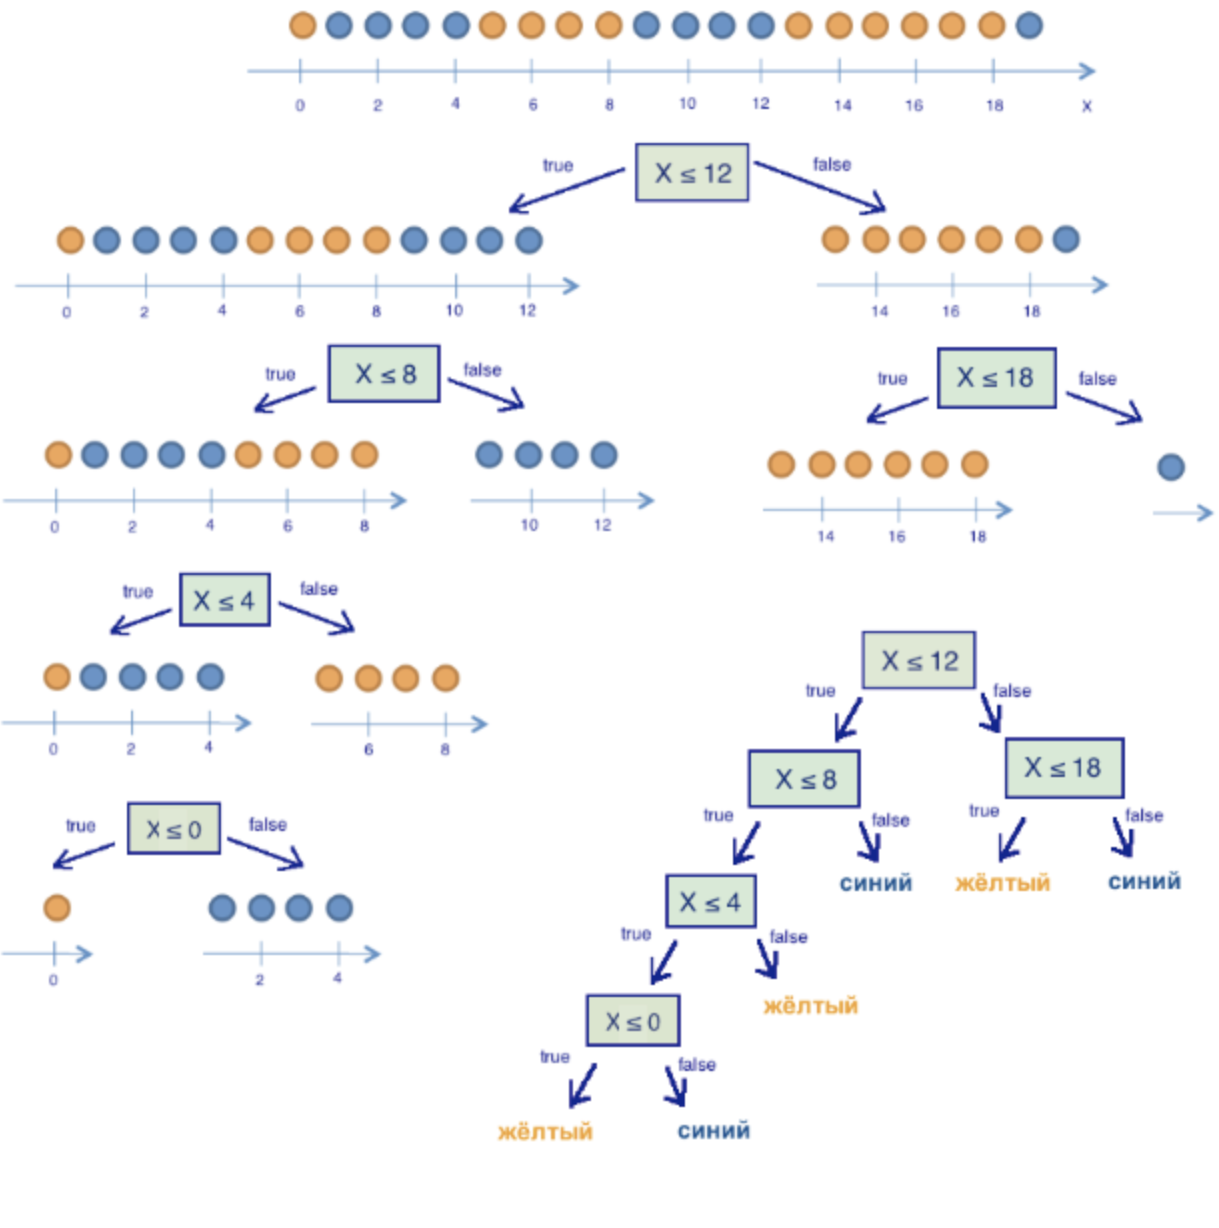

Для регрессоров все так же, только минимизируем другой класс функций.

\begin{align}
\mathbf{D} = \frac{1}{l}\sum^l_{i=1}(y_i-\frac{1}{l}\sum^{l}_{i=1} y_i)^2
\end{align}

# Подбор гиперпараметров и борьба с переобучением

Гиперпараметры для классификаторов\
criterion - {“gini”, “entropy”, “log_loss”} - решающий критерий отбора\
max_depth - максимальная глубина дерева\
min_samples_split - минимальное количество листьев в узле, чтобы сделать новое разделение\
min_samples_leaf - минимальное количество листьев в узле\
max_features - количество фичей, которые мы берем из датасета

Гиперпараметры для регрессоров\
criterion - {“squared_error”, “friedman_mse”, “absolute_error”, “poisson”} - решающий критерий отбора\
max_depth - максимальная глубина дерева\
min_samples_split - минимальное количество листьев в узле, чтобы сделать новое разделение\
min_samples_leaf - минимальное количество листьев в узле\
max_features - количество фичей, которые мы берем из датасета

Плюсы деревьев\
1 неплохо улавливают нелинейные признаки\
2 быстро обучаются
3 сравнительно немного обучаемых параметров\
\
Минусы деревьев\
1 сильное переобучение\
2 есть более сильные модели


# Ансамблируем модели

## Бэггинг

**Как работает бэггинг? Берет из датасета случайным образом с возвращением выборку размера N. Обучаем на них нашу m_i модель, далее берем новую выборку размера N и обучаем m_j модель и так k раз. А далее будем усреднять предсказания наших моделей. В итоге наша метамодель будет выглядеть так.**

\begin{align}
\mathbf{M(x)} = \frac{1}{k}\sum^k_{i=1}m_i(x)
\end{align}

In [ ]:
from sklearn.ensemble import BaggingClassifier

## Random Forest - бэггинг на стероидах

Делаем все то же, что и в бэггинге, только случайным образом в каждой вершине дерева выбираем n случайных признаков из выборки и по ним делаем разделение. Далее для регресси усредняем предсказания каждого дерева, для классификации берем моду. Таким образом это комбинация метода случайных подпространств и бэггинга.

Вопрос - какое главное правило, чтобы наш ансамбль работал?

## Гиперпараметры случайного леса

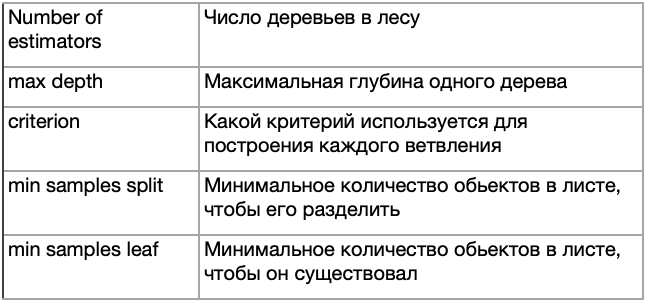

## Подбор гиперпараметров

Гиперпараметры это круто, но как их подбирать? Есть множество способов, но пока что мы остановимся на двух - gridsearch и randomsearch

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

# К практике

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error as mae
from sklearn.ensemble import RandomForestRegressor
random_state = 17

In [ ]:
data = pd.read_excel('/content/значения Англ.xlsx', index_col = '№')
data = data.rename(columns={'Chloride content, mg/dm3 ': 'Chloride content', 'Sulfate content, mg/dm3 ' : 'Sulfate content', 'Compressive strength, MPa':'Compressive strength'})
data.head(90)

X = data.drop('Compressive strength', axis = 1)
y = data['Compressive strength']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state= 41)

In [ ]:
rfr = RandomForestRegressor()

In [ ]:
distributions = dict(max_depth=[50, 75, 100, 150, 200, 250],
                     n_estimators=[100, 200, 250, 300, 350], min_samples_split=[1, 2, 3, 4],\
                     min_samples_leaf=[1, 2, 3, 4])
clf = RandomizedSearchCV(rfr, distributions, random_state=0, verbose = 1, n_iter = 20)
search = clf.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
40 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
40 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py", line 340, in fit
    self._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 600, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/util

In [ ]:
print(search.best_params_)

{'n_estimators': 100, 'min_samples_split': 3, 'min_samples_leaf': 1, 'max_depth': 100}


In [ ]:
rfr = RandomForestRegressor(**search.best_params_)

In [ ]:
rfr.fit(X_train, y_train)

RandomForestRegressor(max_depth=100, min_samples_split=3)

In [ ]:
mae(rfr.predict(X_test), y_test)

1.115306584656086

In [ ]:
scatter = LinearRegression()

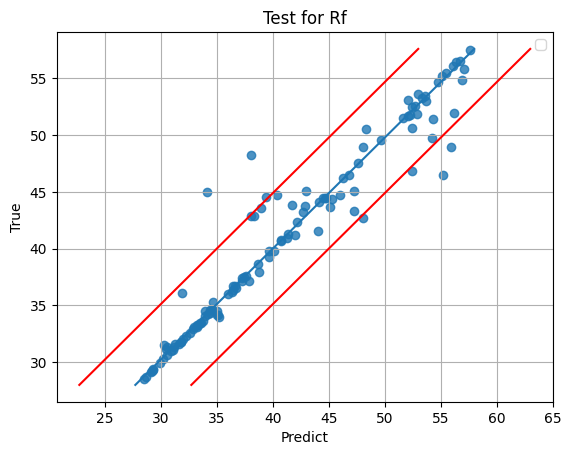

In [ ]:
plt.scatter(y_test, rfr.predict(X_test), alpha = 0.8)
plt.grid(True)

plt.title('Test for Rf')
plt.xlabel('Predict')
x = np.linspace(28, 57.6, 1000)
scatter.fit(np.array([rfr.predict(X_test)]).T, y_test)
plt.ylabel('True')
plt.plot(scatter.coef_ * x + scatter.intercept_, x)

plt.plot(scatter.coef_ * x + scatter.intercept_+5, x, color = 'r')
plt.plot(scatter.coef_ * x + scatter.intercept_ -5, x,  color = 'r')

plt.legend()
plt.show()

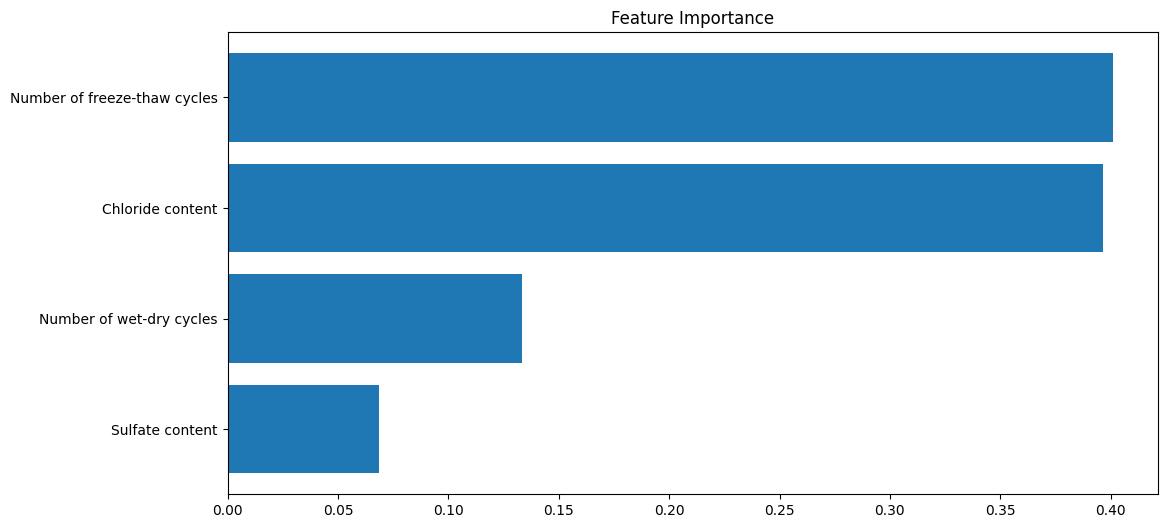

In [ ]:
feature_importance = rfr.feature_importances_
sorted_idx = np.argsort(feature_importance)
fig = plt.figure(figsize=(12, 6))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(X.columns)[sorted_idx])
plt.title('Feature Importance');